# Z Unlock Challenge 1 Fires Data EDA

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Fires Data Set

In [2]:
fires_df=pd.read_csv('fires_data_11-29-2021.csv')
fires_df.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1990,1990,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
1,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1991,1991,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
2,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1992,1992,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
3,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1993,1993,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN
4,GI,Fires,AFG,Afghanistan,7246,Burned Area,6796,Humid tropical forest,1994,1994,3050,FAO TIER 1,ha,0.0,Fc,Calculated data,NaN


## Basic info about Data Set

In [3]:
# rows and columns of dataset
fires_df.shape

(47649, 17)

In [4]:
# basic info column data type and non null values
fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47649 entries, 0 to 47648
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       47649 non-null  object 
 1   Domain            47649 non-null  object 
 2   Area Code (ISO3)  47649 non-null  object 
 3   Area              47649 non-null  object 
 4   Element Code      47649 non-null  int64  
 5   Element           47649 non-null  object 
 6   Item Code         47649 non-null  int64  
 7   Item              47649 non-null  object 
 8   Year Code         47649 non-null  int64  
 9   Year              47649 non-null  int64  
 10  Source Code       47649 non-null  int64  
 11  Source            47649 non-null  object 
 12  Unit              47649 non-null  object 
 13  Value             47649 non-null  float64
 14  Flag              47649 non-null  object 
 15  Flag Description  47649 non-null  object 
 16  Note              0 non-null      float6

In [5]:
# summary statistics
fires_df.describe()

,Element Code,Item Code,Year Code,Year,Source Code,Value,Note
count,47649.0,47649.000000,47649.000000,47649.000000,47649.0,4.764900e+04,0.0
mean,7246.0,6788.428571,2004.636404,2004.636404,3050.0,4.120817e+05,NaN
std,0.0,11.890783,8.609612,8.609612,0.0,2.744637e+06,NaN
min,7246.0,6760.000000,1990.000000,1990.000000,3050.0,0.000000e+00,NaN
25%,7246.0,6789.000000,1997.000000,1997.000000,3050.0,0.000000e+00,NaN
50%,7246.0,6792.000000,2005.000000,2005.000000,3050.0,0.000000e+00,NaN
75%,7246.0,6796.000000,2012.000000,2012.000000,3050.0,5.514973e+03,NaN
max,7246.0,6797.000000,2019.000000,2019.000000,3050.0,1.052085e+08,NaN


In [6]:
# percentage of null values
(fires_df.isna().sum()/fires_df.shape[0])*100

Domain Code           0.0
Domain                0.0
Area Code (ISO3)      0.0
Area                  0.0
Element Code          0.0
Element               0.0
Item Code             0.0
Item                  0.0
Year Code             0.0
Year                  0.0
Source Code           0.0
Source                0.0
Unit                  0.0
Value                 0.0
Flag                  0.0
Flag Description      0.0
Note                100.0
dtype: float64

## Dropping Unnecessary columns

In [7]:
# column names
fires_df.columns

Index(['Domain Code', 'Domain', 'Area Code (ISO3)', 'Area', 'Element Code',
       'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Source Code',
       'Source', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note'],
      dtype='object')

In [8]:
# dropping columns
new_fires_df=fires_df.drop(['Domain Code', 'Domain', 'Area Code (ISO3)','Element Code',
       'Element', 'Item Code','Year Code','Source Code','Source', 'Unit','Flag', 
       'Flag Description', 'Note'],axis=1)

# new data frame
new_fires_df.head()

,Area,Item,Year,Value
0,Afghanistan,Humid tropical forest,1990,0.0
1,Afghanistan,Humid tropical forest,1991,0.0
2,Afghanistan,Humid tropical forest,1992,0.0
3,Afghanistan,Humid tropical forest,1993,0.0
4,Afghanistan,Humid tropical forest,1994,0.0


In [9]:
new_fires_df['Area'].value_counts()

Afghanistan                        210
Puerto Rico                        210
Namibia                            210
Nauru                              210
Nepal                              210
                                  ... 
Czechoslovakia                      21
Ethiopia PDR                        21
USSR                                14
Yugoslav SFR                        14
Pacific Islands Trust Territory      7
Name: Area, Length: 238, dtype: int64

In [10]:
# choosing only Afghanistan, India and Pakistan from 'Area' column
new_fires_selected=new_fires_df[new_fires_df["Area"].isin(["Afghanistan","India","Pakistan"])]
new_fires_selected.head()

,Area,Item,Year,Value
0,Afghanistan,Humid tropical forest,1990,0.0
1,Afghanistan,Humid tropical forest,1991,0.0
2,Afghanistan,Humid tropical forest,1992,0.0
3,Afghanistan,Humid tropical forest,1993,0.0
4,Afghanistan,Humid tropical forest,1994,0.0


In [11]:
# minimum, maximum and mean of numeric columns
new_fires_selected.groupby(by="Area").agg(["min", "max", "mean"])

C:\Users\karar\AppData\Local\Temp\ipykernel_13292\408873437.py:2: FutureWarning: ['Item'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  new_fires_selected.groupby(by="Area").agg(["min", "max", "mean"])


Year               Value                             
              min   max    mean   min           max           mean
Area                                                              
Afghanistan  1990  2019  2004.5   0.0  2.254087e+05    4784.935626
India        1990  2019  2004.5   0.0  2.609465e+06  311726.208020
Pakistan     1990  2019  2004.5   0.0  8.171537e+04    4835.083604

c:\Users\karar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\karar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\karar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

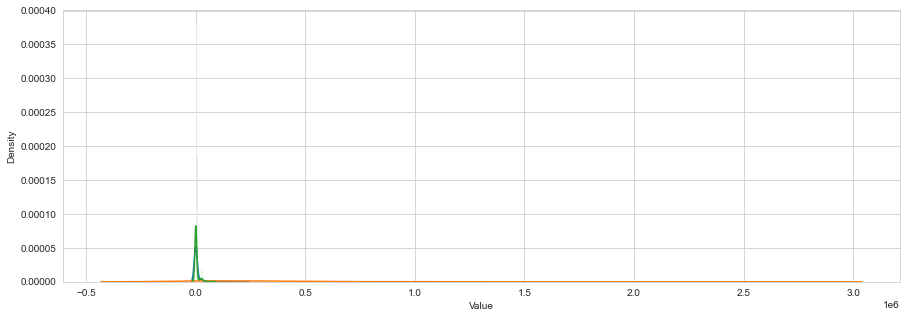

In [12]:
# showing data in distplot
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
# selecting countries 
countries=new_fires_selected['Area'].unique()

for country in countries:
    sns.distplot(new_fires_selected[new_fires_selected["Area"]==country]["Value"])

<AxesSubplot:xlabel='Year', ylabel='Value'>

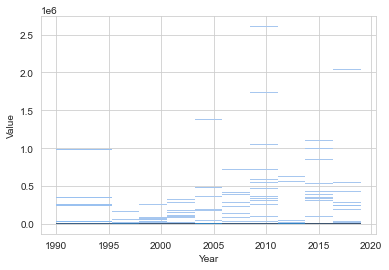

In [13]:
sns.histplot(data=new_fires_selected,x="Year",y="Value")

In [15]:
pip install pycountry_convert


  Using cached pytest-7.1.2-py3-none-any.whl (297 kB)
     -------------------------------------- 10.1/10.1 MB 684.7 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 98.7/98.7 kB 941.1 kB/s eta 0:00:00
     -------------------------------------- 187.7/187.7 kB 1.1 MB/s eta 0:00:00
Using legacy 'setup.py install' for atomicwrites, since package 'wheel' is not installed.
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=b976a5f5c2e2a053984d537a5aea68e20f603ca0a8f17cba2058d888c61865cf
  Stored in directo

In [16]:
import pycountry_convert as pc

In [17]:
f = lambda x: pc.country_name_to_country_alpha2(x, cn_name_format="default")
new_fires_df['Area_code'] = new_fires_df['Area'].apply(f)

KeyError: "Invalid Country Name: 'Belgium-Luxembourg'"